In [67]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from Bio.SeqUtils.ProtParam import ProteinAnalysis
from Bio.SeqUtils.ProtParam import ProtParamData 
import seaborn as sns 
from sklearn.manifold import TSNE   
import plotly.express as px 
import plotly.io as pio


In [2]:
seed_scFv = {
    '14': 'EVQLVETGGGLVQPGGSLRLSCAASGFTLNSYGISWVRQAPGKGPEWVSVIYSDGRRTFYGDSVKGRFTISRDTSTNTVYLQMNSLRVEDTAVYYCAKGRAAGTFDSWGQGTLVTVSSGGGGSGGGGSGGGGSDVVMTQSPESLAVSLGERATISCKSSQSVLYESRNKNSVAWYQQKAGQPPKLLIYWASTRESGVPDRFSGSGSGTDFTLTISSLQAEDAAVYYCQQYHRLPLSFGGGTKVEIK',
    '91': 'EVQLVESGGGLVQPGRSLRLSCAASGFTFDDYAMHWVRQAPGKGLEWVSGISWNSGSIGYADSVKGRFTISRDNAENSLYLQMNSLRAEDTALYYCAKVGRGGGYFDYWGQGTLVTVSSGGGGSGGGGSGGGGSQAVLTQPSSLSASPGASVSLTCTLRSGINVGTYRIYWYQQKPGSPPQYLLRYKSDSDKQQGSGVPSRFSGSKDASANAGILLISGLQSEDEADYYCMIWHSSAWVFGGGTKLTVL',
    '95': 'EVQLVESGAEVKKPGASVKVSCKASGYTFTSYGISWVRQAPGQGLEWMGWISAYNGNTNYAQKLQGRVTMTTDTSTSTAYMELRSLRSDDTAVYYCARVGRGVIDHWGQGTLVTVSSGGGGSGGGGSGGGGSSSELTQDPAVSVALGQTVRITCEGDSLRYYYANWYQQKPGQAPILVIYGKNNRPSGIADRFSGSNSGDTSSLIITGAQAEDEADYYCSSRDSSGFQVFFGAGTKLTVL'
    }


In [3]:
AB_ID = 14

In [4]:
def get_biophysical_properties(protein_seq): 
    X = ProteinAnalysis(protein_seq) 
    mw = X.molecular_weight()
    aromaticity = X.aromaticity() 
    instability = X.instability_index() 
    pI = X.isoelectric_point()
    mean_hydrophobicity = np.mean(X.protein_scale(window=7, param_dict=ProtParamData.kd)) 
    sec_struc = X.secondary_structure_fraction() # [helix, turn, sheet] 
    helix_frac = sec_struc[0] 
    turn_frac = sec_struc[1] 
    sheet_frac = sec_struc[2]
    return mw, aromaticity, instability, pI, mean_hydrophobicity, helix_frac, turn_frac, sheet_frac 


In [5]:
df1 = pd.read_csv('data/data_with_prediction_properties.csv')

In [6]:
df1 = df1[df1['seed_antibody']==AB_ID].reset_index().drop(['index'], axis=1) 

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

### Best antibody from each apporach

In [ ]:
### Seed antibody 
seed_values = df1[(df1['seed_antibody']==AB_ID) & (df1['num_mutation']==0)].to_dict(orient='records')[0]
seed_values 

{'POI': 'MIT_14_HL_scFV',
 'Sequence': 'EVQLVETGGGLVQPGGSLRLSCAASGFTLNSYGISWVRQAPGKGPEWVSVIYSDGRRTFYGDSVKGRFTISRDTSTNTVYLQMNSLRVEDTAVYYCAKGRAAGTFDSWGQGTLVTVSSGGGGSGGGGSGGGGSDVVMTQSPESLAVSLGERATISCKSSQSVLYESRNKNSVAWYQQKAGQPPKLLIYWASTRESGVPDRFSGSGSGTDFTLTISSLQAEDAAVYYCQQYHRLPLSFGGGTKVEIK',
 'Pred_affinity': 0.7840289660257147,
 'affinity_class': 1,
 'seed_antibody': 14,
 'num_mutation': 0,
 'mut_sites': '[]',
 'cdr_mut': nan,
 'improve_binding': 1,
 'Molecular_weight': 25929.4357,
 'Aromaticity': 0.0975609756097561,
 'Instability': 42.69434959349592,
 'Isoelectric_point': 8.64154052734375,
 'mean_Hydrophobicity': -0.3003571428571429,
 'secondary_structure_Helix_fracton': 0.2764227642276423,
 'secondary_structure_Turn_fracton': 0.3414634146341463,
 'secondary_structure_Sheet_fracton': 0.1788617886178861,
 'Model_Prediction': 1.3967998027801514}

In [8]:
### GA-Random 
ga_random = pd.read_csv('data/Ab_'+str(AB_ID)+'_GA_Random.csv')
print(ga_random.shape ) 
ga_random[['Molecular_weight', 'Aromaticity', 'Instability_index', 'Isoelectronic_point', 'mean_hydrophobicity', 'secondary_structure_helix_frac', 'secondary_structure_turn_frac', 'secondary_structure_sheet_frac']] = ga_random['Sequence'].apply(lambda x: pd.Series(get_biophysical_properties(x))) 

ga_random.iloc[ga_random['Pred_affinity'].idxmin()].to_dict()

(50, 9)


{'Sequence': 'EVQLVETGGGLVQPGGSLRLSCAASGFNLNDYGISWVRQAPGKGPEWVSVIYSDGRRTVYGDSVKGRFTISRDTSTNTVYLQMNSLRVEDTAVYYCAKGATAGTFNSWGQGTLVTVSSGGGGSGGGGSGGGGSDVVMTQSPESLAVSLGERATISCSLRAAVQFDSGRKNSVAWYQQKAGQPPKLLIYNANTRGEGVPDRFSGSGSGTDFTLTISSLQAEDAAVYYCQQYHRLPLSFGGGTKVEIK',
 'Pred_affinity': 0.1377527266740799,
 'num_mutation': 20,
 'CDRH1': 'GFNLNDYGIS',
 'CDRH2': 'VIYSDGRRTVYGDSVK',
 'CDRH3': 'GATAGTFNS',
 'CDRL1': 'SLRAAVQFDSGRKNSVA',
 'CDRL2': 'NANTRGE',
 'CDRL3': 'QQYHRLPLS',
 'Molecular_weight': 25700.164399999994,
 'Aromaticity': 0.08943089430894309,
 'Instability_index': 33.869512195121956,
 'Isoelectronic_point': 8.364144325256351,
 'mean_hydrophobicity': -0.27285714285714285,
 'secondary_structure_helix_frac': 0.21544715447154472,
 'secondary_structure_turn_frac': 0.38211382113821135,
 'secondary_structure_sheet_frac': 0.34552845528455284}

In [9]:
### GA-PSSM 
ga_pssm = pd.read_csv('data/Ab_'+str(AB_ID)+'_GA_PSSM.csv')
print(ga_pssm.shape ) 
ga_pssm[['Molecular_weight', 'Aromaticity', 'Instability_index', 'Isoelectronic_point', 'mean_hydrophobicity', 'secondary_structure_helix_frac', 'secondary_structure_turn_frac', 'secondary_structure_sheet_frac']] = ga_pssm['Sequence'].apply(lambda x: pd.Series(get_biophysical_properties(x))) 

ga_pssm.iloc[ga_pssm['Pred_affinity'].idxmin()].to_dict() 


(50, 9)


{'Sequence': 'EVQLVETGGGLVQPGGSLRLSCAASGFNLNEYGISWVRQAPGKGPEWVSVIYSDGRRTVYGDSVQGRFTISRDTSTNTVYLQMNSLRVEDTAVYYCAKGRAAGTFDAWGQGTLVTVSSGGGGSGGGGSGGGGSDVVMTQSPESLAVSLGERATISCSITDSVVSNNRGRNSVAWYQQKAGQPPKLLIYDATTRASGVPDRFSGSGSGTDFTLTISSLQAEDAAVYYCQQYHRLPLSFGGGTKVEIK',
 'Pred_affinity': 0.1312442570924759,
 'num_mutation': 18,
 'CDRH1': 'GFNLNEYGIS',
 'CDRH2': 'VIYSDGRRTVYGDSVQ',
 'CDRH3': 'GRAAGTFDA',
 'CDRL1': 'SITDSVVSNNRGRNSVA',
 'CDRL2': 'DATTRAS',
 'CDRL3': 'QQYHRLPLS',
 'Molecular_weight': 25684.077400000002,
 'Aromaticity': 0.08536585365853658,
 'Instability_index': 36.316260162601615,
 'Isoelectronic_point': 6.861966896057129,
 'mean_hydrophobicity': -0.25494047619047616,
 'secondary_structure_helix_frac': 0.20325203252032523,
 'secondary_structure_turn_frac': 0.3821138211382114,
 'secondary_structure_sheet_frac': 0.34959349593495936}

In [10]:
### GA-ABModel
ga_abmodel = pd.read_csv('data/Ab_'+str(AB_ID)+'_GA_ABModel.csv')
print(ga_abmodel.shape ) 
ga_abmodel[['Molecular_weight', 'Aromaticity', 'Instability_index', 'Isoelectronic_point', 'mean_hydrophobicity', 'secondary_structure_helix_frac', 'secondary_structure_turn_frac', 'secondary_structure_sheet_frac']] = ga_abmodel['Sequence'].apply(lambda x: pd.Series(get_biophysical_properties(x))) 

ga_abmodel.iloc[ga_abmodel['Pred_affinity'].idxmin()].to_dict() 


(50, 9)


{'Sequence': 'EVQLVETGGGLVQPGGSLRLSCAASGYNLNSYGISWVRQAPGKGPEWVSVIYSDGRRTFYADSIQGRFTISRDTSTNTVYLQMNSLRVEDTAVYYCAKGKAAGTFDGWGQGTLVTVSSGGGGSGGGGSGGGGSDVVMTQSPESLAVSLGERATISCTLAETVSSANRSKNSVAWYQQKAGQPPKLLIYNGGTRESGVPDRFSGSGSGTDFTLTISSLQAEDAAVYYCQQYSRLPLSFGGGTKVEIK',
 'Pred_affinity': 0.1228334531188011,
 'num_mutation': 21,
 'CDRH1': 'GYNLNSYGIS',
 'CDRH2': 'VIYSDGRRTFYADSIQ',
 'CDRH3': 'GKAAGTFDG',
 'CDRL1': 'TLAETVSSANRSKNSVA',
 'CDRL2': 'NGGTRES',
 'CDRL3': 'QQYSRLPLS',
 'Molecular_weight': 25599.9942,
 'Aromaticity': 0.0894308943089431,
 'Instability_index': 41.82565040650406,
 'Isoelectronic_point': 7.859550285339356,
 'mean_hydrophobicity': -0.2724404761904762,
 'secondary_structure_helix_frac': 0.21951219512195125,
 'secondary_structure_turn_frac': 0.3861788617886179,
 'secondary_structure_sheet_frac': 0.3455284552845529}

In [11]:
### SA-Random
sa_random = pd.read_csv('data/Ab-'+str(AB_ID)+'-SA-Random.csv')
print(sa_random.shape ) 
sa_random[['Molecular_weight', 'Aromaticity', 'Instability_index', 'Isoelectronic_point', 'mean_hydrophobicity', 'secondary_structure_helix_frac', 'secondary_structure_turn_frac', 'secondary_structure_sheet_frac']] = sa_random['Sequence'].apply(lambda x: pd.Series(get_biophysical_properties(x))) 

sa_random.iloc[sa_random['Pred_affinity'].idxmin()].to_dict() 


(201, 3)


{'Sequence': 'EVQLVETGGGLVQPGGSLRLSCAASGFHLNEYGISWVRQAPGKGPEWVSVIYADGRRTAYGDSVEGRFTISRDTSTNTVYLQMNSLRVEDTAVYYCAKGTNAGTFNGWGQGTLVTVSSGGGGSGGGGSGGGGSDVVMTQSPESLAVSLGERATISCNLSQIGDTSGREKNSVAWYQQKAGQPPKLLIYDSNSRTQGVPDRFSGSGSGTDFTLTISSLQAEDAAVYYCQQYHRLPLSFGGGTKVEIK',
 'Pred_affinity': 0.1289916932582855,
 'num_mut': 24,
 'Molecular_weight': 25723.024099999995,
 'Aromaticity': 0.08536585365853658,
 'Instability_index': 36.1650406504065,
 'Isoelectronic_point': 5.739453697204591,
 'mean_hydrophobicity': -0.3424404761904762,
 'secondary_structure_helix_frac': 0.2113821138211382,
 'secondary_structure_turn_frac': 0.38617886178861793,
 'secondary_structure_sheet_frac': 0.3414634146341463}

In [12]:
### SA-PSSM
sa_pssm = pd.read_csv('data/Ab-'+str(AB_ID)+'-SA-PSSM.csv')
print(sa_pssm.shape ) 
sa_pssm[['Molecular_weight', 'Aromaticity', 'Instability_index', 'Isoelectronic_point', 'mean_hydrophobicity', 'secondary_structure_helix_frac', 'secondary_structure_turn_frac', 'secondary_structure_sheet_frac']] = sa_pssm['Sequence'].apply(lambda x: pd.Series(get_biophysical_properties(x))) 

sa_pssm.iloc[sa_pssm['Pred_affinity'].idxmin()].to_dict() 


(44, 3)


{'Sequence': 'EVQLVETGGGLVQPGGSLRLSCAASGNKLDNYGISWVRQAPGKGPEWVSVIYSDGRRTAYSDSVHGRFTISRDTSTNTVYLQMNSLRVEDTAVYYCAKGRSAGTFDSWGQGTLVTVSSGGGGSGGGGSGGGGSDVVMTQSPESLAVSLGERATISCRETTTDLYENQNQNSVAWYQQKAGQPPKLLIYGANQREEGVPDRFSGSGSGTDFTLTISSLQAEDAAVYYCQQYHTLPLSFGGGTKVEIK',
 'Pred_affinity': 0.1620692014694214,
 'num_mut': 22,
 'Molecular_weight': 25928.146500000003,
 'Aromaticity': 0.08536585365853659,
 'Instability_index': 36.58821138211382,
 'Isoelectronic_point': 5.249160575866698,
 'mean_hydrophobicity': -0.41994047619047614,
 'secondary_structure_helix_frac': 0.21544715447154472,
 'secondary_structure_turn_frac': 0.37804878048780494,
 'secondary_structure_sheet_frac': 0.34146341463414637}

In [13]:
### SA-ABModel
sa_abmodel = pd.read_csv('data/Ab-'+str(AB_ID)+'-SA-ABModel.csv')
print(sa_abmodel.shape ) 
sa_abmodel[['Molecular_weight', 'Aromaticity', 'Instability_index', 'Isoelectronic_point', 'mean_hydrophobicity', 'secondary_structure_helix_frac', 'secondary_structure_turn_frac', 'secondary_structure_sheet_frac']] = sa_abmodel['Sequence'].apply(lambda x: pd.Series(get_biophysical_properties(x))) 

sa_abmodel.iloc[sa_abmodel['Pred_affinity'].idxmin()].to_dict()


(109, 3)


{'Sequence': 'EVQLVETGGGLVQPGGSLRLSCAASGSNLEEYGISWVRQAPGKGPEWVSVIYSDGRRSFYADNVKGRFTISRDTSTNTVYLQMNSLRVEDTAVYYCAKGENAGTFSGWGQGTLVTVSSGGGGSGGGGSGGGGSDVVMTQSPESLAVSLGERATISCSISDRLTYSSRNKNNVAWYQQKAGQPPKLLIYNGSTRESGVPDRFSGSGSGTDFTLTISSLQAEDAAVYYCQQYSRLPLAFGGGTKVEIK',
 'Pred_affinity': 0.1281656473875045,
 'num_mut': 23,
 'Molecular_weight': 25800.146300000008,
 'Aromaticity': 0.0894308943089431,
 'Instability_index': 41.745162601626014,
 'Isoelectronic_point': 6.628244972229004,
 'mean_hydrophobicity': -0.34577380952380954,
 'secondary_structure_helix_frac': 0.21951219512195125,
 'secondary_structure_turn_frac': 0.3943089430894309,
 'secondary_structure_sheet_frac': 0.33739837398373984}

In [14]:
### PSSM 
pssm_df = pd.read_csv('data/Ab_'+str(AB_ID)+'_denovo_pssm.csv').sample(n=1000, random_state=12).reset_index(drop=True) 
pssm_df[['Molecular_weight', 'Aromaticity', 'Instability_index', 'Isoelectronic_point', 'mean_hydrophobicity', 'secondary_structure_helix_frac', 'secondary_structure_turn_frac', 'secondary_structure_sheet_frac']] = pssm_df['Sequence'].apply(lambda x: pd.Series(get_biophysical_properties(x))) 

pssm_df.iloc[pssm_df['Pred_affinity'].idxmin()].to_dict() 

{'Sequence': 'EVQLVETGGGLVQPGGSLRLSCAASGFTLNSYGISWVRQAPGKGPEWVSVIYSDGRRTFYGDSVKGRFTISRDTSTNTVYLQMNSLRVEDTAVYYCAKGRAAGTFDSWGQGTLVTVSSGGGGSGGGGSGGGGSDVVMTQSPESLAVSLGERATISCKSSESELYESRNKNSVAWYQQKAGQPPKLLIYNASTRESGVPDRFSGSGSGTDFTLTISSLQAEDAAVYYCQQYNRLPLSFGGGTKVEIK',
 'Pred_affinity': 0.2895054519176483,
 'num_mut': 4,
 'Molecular_weight': 25865.259500000007,
 'Aromaticity': 0.0934959349593496,
 'Instability_index': 43.00491869918697,
 'Isoelectronic_point': 7.855230903625489,
 'mean_hydrophobicity': -0.3445238095238095,
 'secondary_structure_helix_frac': 0.22357723577235775,
 'secondary_structure_turn_frac': 0.3861788617886179,
 'secondary_structure_sheet_frac': 0.34146341463414637}

### Load data for comparison with biophysical properties 

In [16]:
df = pd.read_csv('data/Ab_'+str(AB_ID)+'_sample.csv')

In [17]:
df[df['num_mutation']==0].to_dict()

{'POI': {0: 'MIT_14_HL_scFV'},
 'Sequence': {0: 'EVQLVETGGGLVQPGGSLRLSCAASGFTLNSYGISWVRQAPGKGPEWVSVIYSDGRRTFYGDSVKGRFTISRDTSTNTVYLQMNSLRVEDTAVYYCAKGRAAGTFDSWGQGTLVTVSSGGGGSGGGGSGGGGSDVVMTQSPESLAVSLGERATISCKSSQSVLYESRNKNSVAWYQQKAGQPPKLLIYWASTRESGVPDRFSGSGSGTDFTLTISSLQAEDAAVYYCQQYHRLPLSFGGGTKVEIK'},
 'Pred_affinity': {0: 0.7840289660257147},
 'affinity_class': {0: 1},
 'seed_antibody': {0: 14},
 'num_mutation': {0: 0},
 'mut_sites': {0: '[]'},
 'cdr_mut': {0: nan},
 'improve_binding': {0: 1},
 'Molecular_weight': {0: 25929.4357},
 'Aromaticity': {0: 0.0975609756097561},
 'Instability': {0: 42.69434959349592},
 'Isoelectric_point': {0: 8.64154052734375},
 'mean_Hydrophobicity': {0: -0.3003571428571429},
 'secondary_structure_Helix_fracton': {0: 0.2764227642276423},
 'secondary_structure_Turn_fracton': {0: 0.3414634146341463},
 'secondary_structure_Sheet_fracton': {0: 0.1788617886178861},
 'Model_Prediction': {0: 1.3967998027801514}}

## Mutation Effect

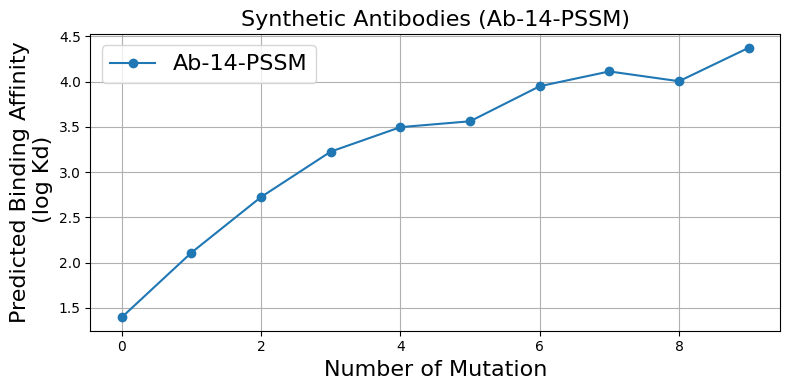

In [25]:
grouped_df = pssm_df.groupby('num_mut')

# Calculate mean and variance for each group
mean_values_pssm = grouped_df['Pred_affinity'].mean()
variance_values_pssm = grouped_df['Pred_affinity'].var() 

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(mean_values_pssm.index, mean_values_pssm,marker='o',  label='Ab-'+str(AB_ID)+'-PSSM')
#ax.plot(mean_values_pssm.index, mean_values_pssm,marker='s', color='orange',  label='Mean (PSSM)')

# Error bar for variance
#ax.errorbar(mean_values_pssm.index, mean_values_pssm, yerr=variance_values_pssm, fmt='none', ecolor='red', capsize=5, label='Variance')

# Customize the plot
ax.set_title('Synthetic Antibodies (Ab-'+str(AB_ID)+'-PSSM)', fontsize=16 )
ax.set_xlabel('Number of Mutation', fontsize=16)
ax.set_ylabel('Predicted Binding Affinity\n (log Kd)', fontsize=16)
ax.legend(fontsize=16)
plt.grid(visible=True, which='both')
plt.tight_layout() 
plt.savefig('plots/Ab-'+str(AB_ID)+'/Ab-'+str(AB_ID)+'-mutation_analysis-PSSM')
plt.show()

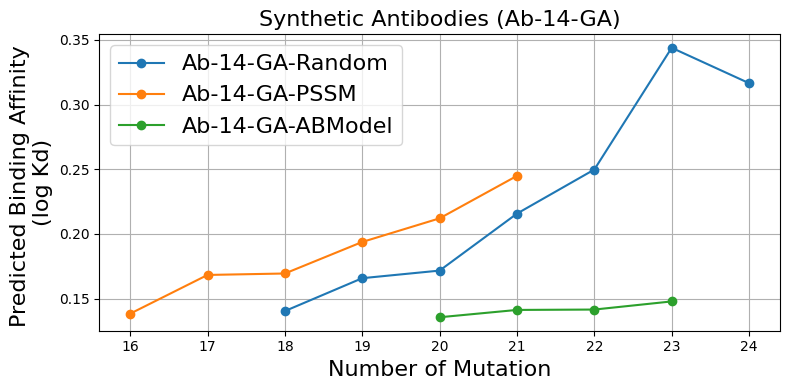

In [24]:

mean_ga_random = ga_random.groupby('num_mutation')['Pred_affinity'].mean()
mean_ga_pssm = ga_pssm.groupby('num_mutation')['Pred_affinity'].mean()
mean_ga_abmodel = ga_abmodel.groupby('num_mutation')['Pred_affinity'].mean()



# Scatter plot for mean values
fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(mean_ga_random.index, mean_ga_random, marker='o',   label='Ab-'+str(AB_ID)+'-GA-Random')
ax.plot(mean_ga_pssm.index, mean_ga_pssm, marker='o',   label='Ab-'+str(AB_ID)+'-GA-PSSM')
ax.plot(mean_ga_abmodel.index, mean_ga_abmodel, marker='o',   label='Ab-'+str(AB_ID)+'-GA-ABModel')

# Customize the plot
ax.set_title('Synthetic Antibodies (Ab-'+str(AB_ID)+'-GA)', fontsize=16)
ax.set_xlabel('Number of Mutation', fontsize=16)
ax.set_ylabel('Predicted Binding Affinity \n(log Kd)', fontsize=16)
ax.legend(fontsize=16)
plt.grid(visible=True, which='both')
plt.tight_layout() 
plt.savefig('plots/Ab-'+str(AB_ID)+'/Ab-'+str(AB_ID)+'-mutation_analysis-GA')
plt.show()

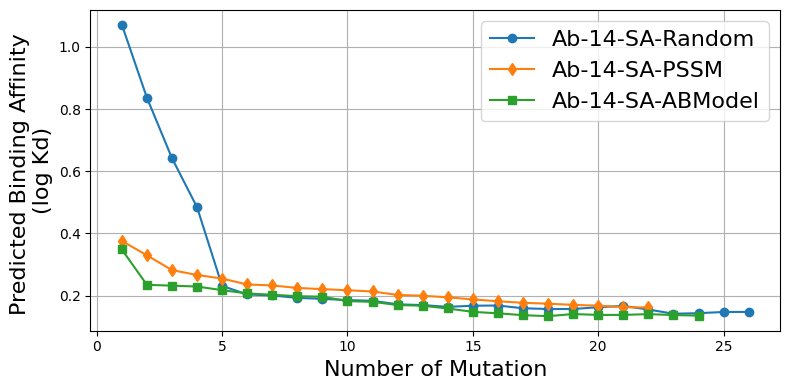

In [27]:
mean_sa_random = sa_random.groupby('num_mut')['Pred_affinity'].mean()
mean_sa_pssm = sa_pssm.groupby('num_mut')['Pred_affinity'].mean()
mean_sa_abmodel = sa_abmodel.groupby('num_mut')['Pred_affinity'].mean()

# Scatter plot for mean values
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(mean_sa_random.index, mean_sa_random, marker='o',   label='Ab-'+str(AB_ID)+'-SA-Random')
ax.plot(mean_sa_pssm.index, mean_sa_pssm, marker='d',   label='Ab-'+str(AB_ID)+'-SA-PSSM')
ax.plot(mean_sa_abmodel.index, mean_sa_abmodel, marker='s',   label='Ab-'+str(AB_ID)+'-SA-ABModel')

# Customize the plot
#ax.set_title('Synthetic Antibodies (Ab-'+str(AB_ID)+'-SA)', fontsize=16)
ax.set_xlabel('Number of Mutation', fontsize=16)
ax.set_ylabel('Predicted Binding Affinity \n(log Kd)', fontsize=16)
ax.legend(fontsize=16)
plt.grid(visible=True, which='both')
plt.tight_layout() 
plt.savefig('plots/Ab-'+str(AB_ID)+'/Ab-'+str(AB_ID)+'-mutation_analysis-SA')
plt.show()

## Fold Improvement

In [29]:
pred_affinity ={'14': 0.784029, '91': 1.020438, '95': 1.834988}

model_pred_affinity ={'14': 1.3968, '91': 2.451342, '95': 2.217252} 

In [22]:
import math

# Assuming fitness values are in -log10 scale
initial_log_fitness_model = model_pred_affinity[str(AB_ID)]
initial_log_fitness = pred_affinity[str(AB_ID)]   


final_log_fitness =  pssm_df.iloc[pssm_df['Pred_affinity'].idxmin()]['Pred_affinity'] 
fold_improvement = (10 ** (initial_log_fitness_model)) / (10 ** (final_log_fitness) ) 
print(f"Fold Improvement for Ab-14-PSSM: {fold_improvement} ")

final_log_fitness =  ga_random.iloc[ga_random['Pred_affinity'].idxmin()]['Pred_affinity'] 
fold_improvement = (10 ** (initial_log_fitness_model)) / (10 ** (final_log_fitness) ) 
print(f"Fold Improvement for Ab-14-GA-Random: {fold_improvement} ")

final_log_fitness =  ga_pssm.iloc[ga_pssm['Pred_affinity'].idxmin()]['Pred_affinity'] 
fold_improvement = (10 ** (initial_log_fitness_model)) / (10 ** (final_log_fitness) ) 
print(f"Fold Improvement for Ab-14-GA-PSSM: {fold_improvement} ")

final_log_fitness =  ga_abmodel.iloc[ga_abmodel['Pred_affinity'].idxmin()]['Pred_affinity'] 
fold_improvement = (10 ** (initial_log_fitness_model)) / (10 ** (final_log_fitness) ) 
print(f"Fold Improvement for Ab-14-GA-ABModel: {fold_improvement} ")

final_log_fitness =  sa_random.iloc[sa_random['Pred_affinity'].idxmin()]['Pred_affinity'] 
fold_improvement = (10 ** (initial_log_fitness_model)) / (10 ** (final_log_fitness) ) 
print(f"Fold Improvement for Ab-14-SA-Random: {fold_improvement} ")

final_log_fitness =  sa_pssm.iloc[sa_pssm['Pred_affinity'].idxmin()]['Pred_affinity'] 
fold_improvement = (10 ** (initial_log_fitness_model)) / (10 ** (final_log_fitness) ) 
print(f"Fold Improvement for Ab-14-SA-PSSM: {fold_improvement} ")

final_log_fitness =  sa_abmodel.iloc[sa_abmodel['Pred_affinity'].idxmin()]['Pred_affinity'] 
fold_improvement = (10 ** (initial_log_fitness_model)) / (10 ** (final_log_fitness) ) 
print(f"Fold Improvement for Ab-14-SA-ABModel: {fold_improvement} ")




Fold Improvement for Ab-14-PSSM: 12.802493030492878 
Fold Improvement for Ab-14-GA-Random: 18.15713293962278 
Fold Improvement for Ab-14-GA-PSSM: 18.43129044540282 
Fold Improvement for Ab-14-GA-ABModel: 18.79172061136177 
Fold Improvement for Ab-14-SA-Random: 18.527136735500882 
Fold Improvement for Ab-14-SA-PSSM: 17.168438556475362 
Fold Improvement for Ab-14-SA-ABModel: 18.56240964210501 


## Generated Antibodies Vs. Dataset Antibodies

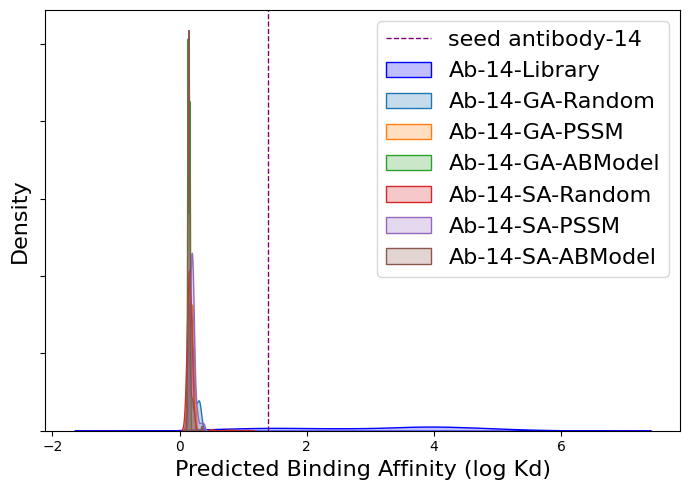

In [35]:

plt.figure(figsize=(7,5))
plt.axvline(x=model_pred_affinity[str(AB_ID)], color='purple', linestyle='--', linewidth=1, label='seed antibody-'+str(AB_ID)+'')
sns.kdeplot(df['Pred_affinity'], color='blue', fill=True, label='Ab-'+str(AB_ID)+'-Library')
sns.kdeplot(ga_random['Pred_affinity'], fill=True, label='Ab-'+str(AB_ID)+'-GA-Random')
sns.kdeplot(ga_pssm['Pred_affinity'], fill=True, label='Ab-'+str(AB_ID)+'-GA-PSSM')
sns.kdeplot(ga_abmodel['Pred_affinity'], fill=True, label='Ab-'+str(AB_ID)+'-GA-ABModel')
sns.kdeplot(sa_random['Pred_affinity'], fill=True, label='Ab-'+str(AB_ID)+'-SA-Random')
sns.kdeplot(sa_pssm['Pred_affinity'], fill=True, label='Ab-'+str(AB_ID)+'-SA-PSSM')
sns.kdeplot(sa_abmodel['Pred_affinity'], fill=True, label='Ab-'+str(AB_ID)+'-SA-ABModel')

# Add labels and legend
plt.xlabel('Predicted Binding Affinity (log Kd)', fontsize=16)
plt.ylabel('Density', fontsize=16)
plt.gca().set_yticklabels([])
#plt.title('Distribution of predicted binding affinity ')
plt.legend(fontsize=16)

# Show plot
#plt.grid(True, which='both')
plt.tight_layout() 
plt.savefig('plots/Ab-'+str(AB_ID)+'/Ab-'+str(AB_ID)+'-distribution-1')
plt.show()


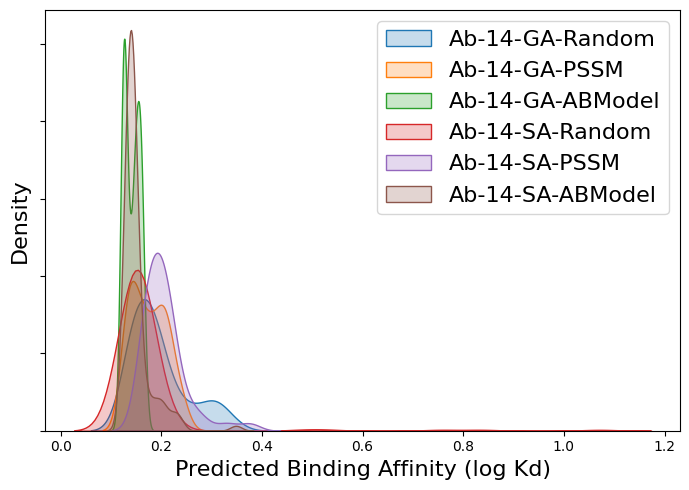

In [36]:
plt.figure(figsize=(7,5))
sns.kdeplot(ga_random['Pred_affinity'], fill=True, label='Ab-'+str(AB_ID)+'-GA-Random')
sns.kdeplot(ga_pssm['Pred_affinity'], fill=True, label='Ab-'+str(AB_ID)+'-GA-PSSM')
sns.kdeplot(ga_abmodel['Pred_affinity'], fill=True, label='Ab-'+str(AB_ID)+'-GA-ABModel')
sns.kdeplot(sa_random['Pred_affinity'], fill=True, label='Ab-'+str(AB_ID)+'-SA-Random')
sns.kdeplot(sa_pssm['Pred_affinity'], fill=True, label='Ab-'+str(AB_ID)+'-SA-PSSM')
sns.kdeplot(sa_abmodel['Pred_affinity'], fill=True, label='Ab-'+str(AB_ID)+'-SA-ABModel')

# Add labels and legend
plt.xlabel('Predicted Binding Affinity (log Kd)', fontsize=16)
plt.ylabel('Density', fontsize=16)
plt.gca().set_yticklabels([])
#plt.title('Distribution of predicted binding affinity ')
plt.legend(fontsize=16)

# Show plot
#plt.grid(True, which='both')
plt.tight_layout() 
plt.savefig('plots/Ab-'+str(AB_ID)+'/Ab-'+str(AB_ID)+'-distribution-2')
plt.show()

## Biophysical Properties

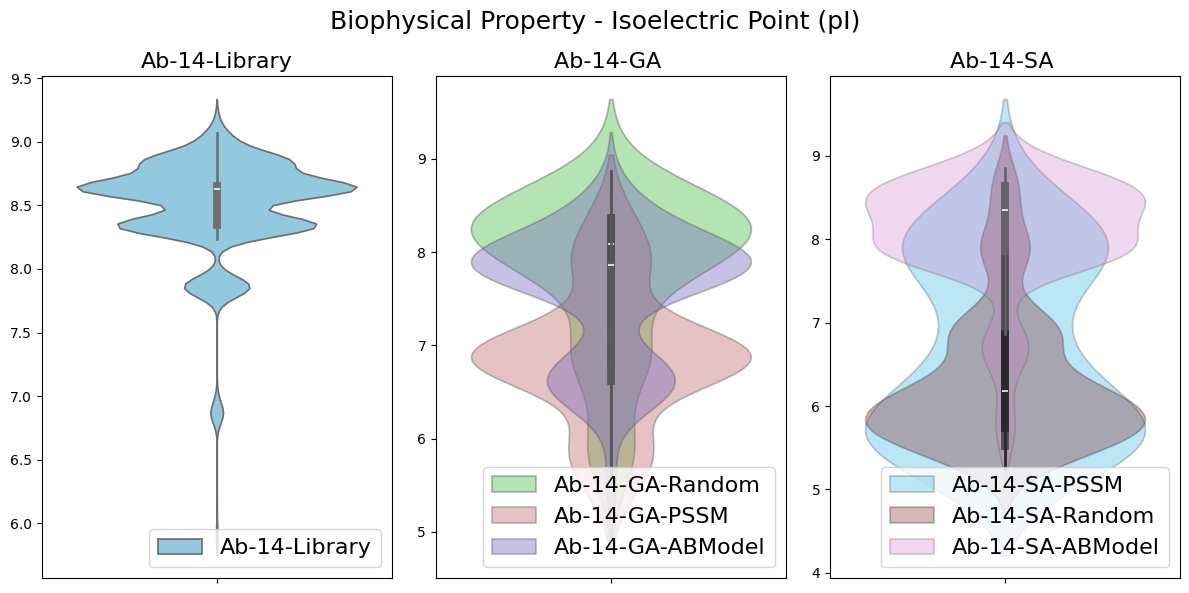

In [19]:
fig, axs = plt.subplots(1, 3, figsize=(12, 6)) 
sns.violinplot(y=df['Isoelectric_point'], color='skyblue', alpha=1, ax=axs[0], label='Ab-'+str(AB_ID)+'-Library')
#sns.violinplot(y=pssm_df['Isoelectronic_point'], color='yellow', alpha=0.8, ax=axs[0], label='Ab-'+str(AB_ID)+'-PSSM')
sns.violinplot(y=ga_random['Isoelectronic_point'], color='limegreen',  alpha=0.4, ax=axs[1], label='Ab-'+str(AB_ID)+'-GA-Random')
sns.violinplot(y=ga_pssm['Isoelectronic_point'],  color='indianred', alpha=0.4, ax=axs[1], label='Ab-'+str(AB_ID)+'-GA-PSSM')
sns.violinplot(y=ga_abmodel['Isoelectronic_point'], color='slateblue', alpha=0.4, ax=axs[1], label='Ab-'+str(AB_ID)+'-GA-ABModel')

sns.violinplot(y=sa_pssm['Isoelectronic_point'],  color='deepskyblue', alpha=0.3, ax=axs[2], label='Ab-'+str(AB_ID)+'-SA-PSSM')
sns.violinplot(y=sa_random['Isoelectronic_point'], color='darkred',  alpha=0.3, ax=axs[2], label='Ab-'+str(AB_ID)+'-SA-Random')
sns.violinplot(y=sa_abmodel['Isoelectronic_point'], color='orchid', alpha=0.3, ax=axs[2], label='Ab-'+str(AB_ID)+'-SA-ABModel')

axs[0].set_title('Ab-'+str(AB_ID)+'-Library', fontsize=16)
axs[1].set_title('Ab-'+str(AB_ID)+'-GA ', fontsize=16)
axs[2].set_title('Ab-'+str(AB_ID)+'-SA ', fontsize=16)
axs[0].set_ylabel('', fontsize=16)
axs[1].set_ylabel('')
axs[2].set_ylabel('')
axs[0].legend(fontsize=16, loc='lower right')
axs[1].legend(fontsize=16, loc='lower right')
axs[2].legend(fontsize=16, loc='lower right')

plt.suptitle('Biophysical Property - Isoelectric Point (pI)', fontsize=18)

plt.tight_layout() 
plt.savefig('plots/Ab-'+str(AB_ID)+'/Ab-'+str(AB_ID)+'-Isoelectric_point')
plt.show()


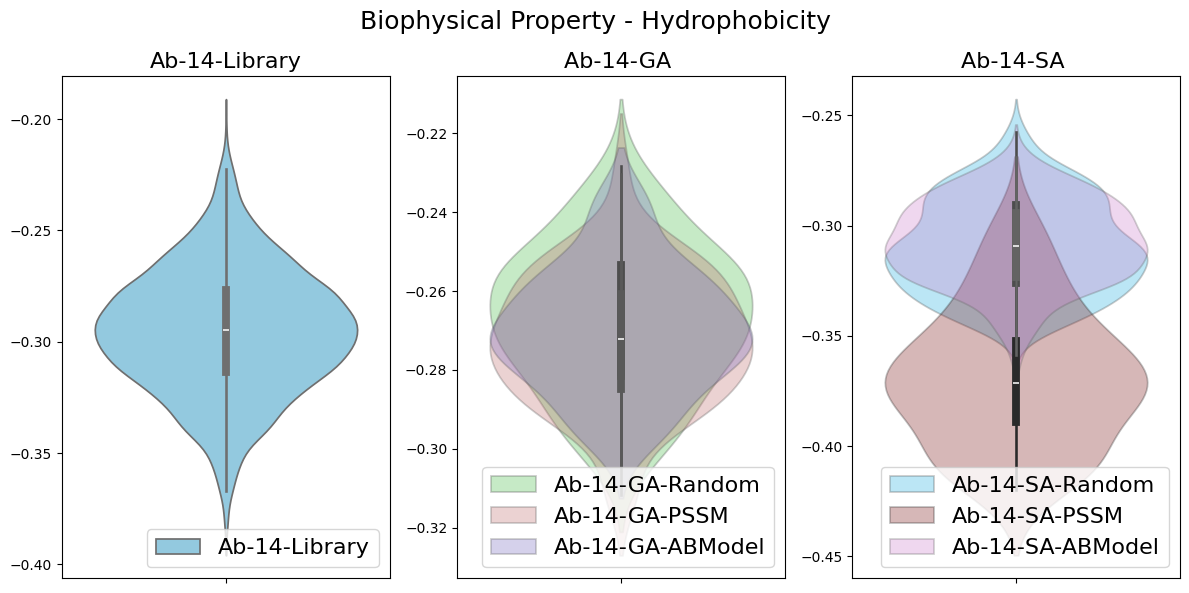

In [71]:
fig, axs = plt.subplots(1, 3, figsize=(12, 6)) 
sns.violinplot(y=df['mean_Hydrophobicity'], color='skyblue', alpha=1, ax=axs[0], label='Ab-'+str(AB_ID)+'-Library')
#sns.violinplot(y=pssm_df['mean_hydrophobicity'], color='yellow', alpha=0.8, ax=axs[0], label='Ab-'+str(AB_ID)+'-PSSM')
sns.violinplot(y=ga_random['mean_hydrophobicity'], color='limegreen',  alpha=0.3, ax=axs[1], label='Ab-'+str(AB_ID)+'-GA-Random')
sns.violinplot(y=ga_pssm['mean_hydrophobicity'],  color='indianred', alpha=0.3, ax=axs[1], label='Ab-'+str(AB_ID)+'-GA-PSSM')
sns.violinplot(y=ga_abmodel['mean_hydrophobicity'], color='slateblue', alpha=0.3, ax=axs[1], label='Ab-'+str(AB_ID)+'-GA-ABModel')
sns.violinplot(y=sa_random['mean_hydrophobicity'], color='deepskyblue',  alpha=0.3, ax=axs[2], label='Ab-'+str(AB_ID)+'-SA-Random')
sns.violinplot(y=sa_pssm['mean_hydrophobicity'],  color='darkred', alpha=0.3, ax=axs[2], label='Ab-'+str(AB_ID)+'-SA-PSSM')
sns.violinplot(y=sa_abmodel['mean_hydrophobicity'], color='orchid', alpha=0.3, ax=axs[2], label='Ab-'+str(AB_ID)+'-SA-ABModel')

axs[0].set_title('Ab-'+str(AB_ID)+'-Library', fontsize=16)
axs[1].set_title('Ab-'+str(AB_ID)+'-GA ', fontsize=16)
axs[2].set_title('Ab-'+str(AB_ID)+'-SA ', fontsize=16)
axs[0].set_ylabel('', fontsize=16)
axs[1].set_ylabel('')
axs[2].set_ylabel('')
axs[0].legend(fontsize=16, loc='lower right')
axs[1].legend(fontsize=16, loc='lower right')
axs[2].legend(fontsize=16, loc='lower right')

plt.suptitle('Biophysical Property - Hydrophobicity', fontsize=18)
plt.tight_layout() 
plt.savefig('plots/Ab-'+str(AB_ID)+'/Ab-'+str(AB_ID)+'-Hydrophobicity')
plt.show()

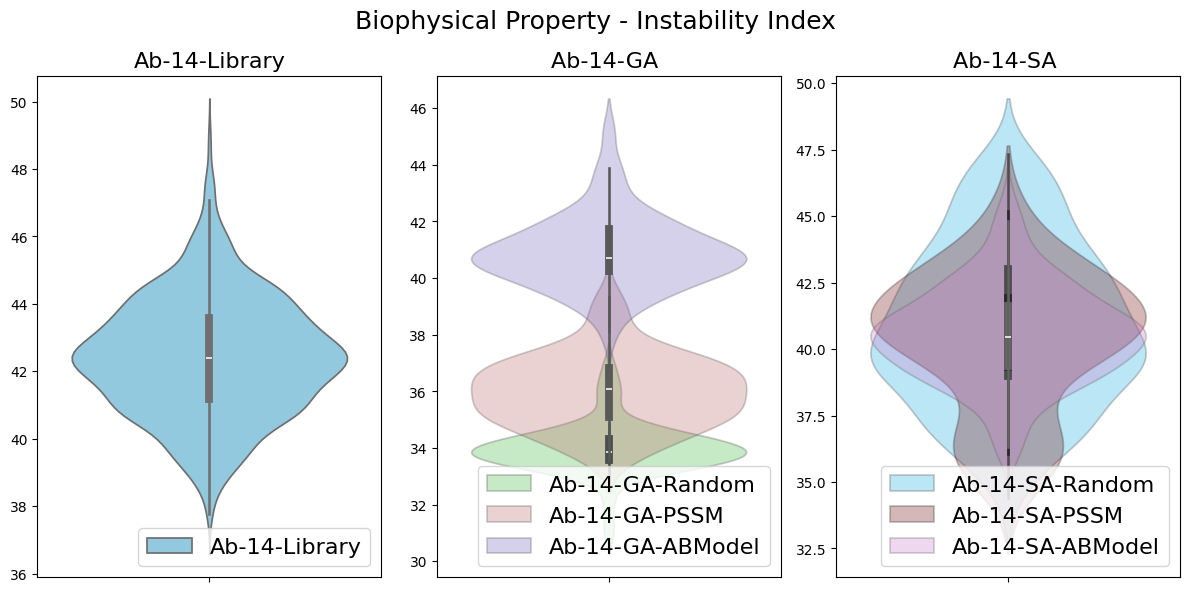

In [70]:
fig, axs = plt.subplots(1, 3, figsize=(12, 6)) 
sns.violinplot(y=df['Instability'], color='skyblue', alpha=1, ax=axs[0], label='Ab-'+str(AB_ID)+'-Library')
#sns.violinplot(y=pssm_df['Instability_index'], color='yellow', alpha=0.8, ax=axs[0], label='Ab-'+str(AB_ID)+'-PSSM')
sns.violinplot(y=ga_random['Instability_index'], color='limegreen',  alpha=0.3, ax=axs[1], label='Ab-'+str(AB_ID)+'-GA-Random')
sns.violinplot(y=ga_pssm['Instability_index'],  color='indianred', alpha=0.3, ax=axs[1], label='Ab-'+str(AB_ID)+'-GA-PSSM')
sns.violinplot(y=ga_abmodel['Instability_index'], color='slateblue', alpha=0.3, ax=axs[1], label='Ab-'+str(AB_ID)+'-GA-ABModel')
sns.violinplot(y=sa_random['Instability_index'], color='deepskyblue',  alpha=0.3, ax=axs[2], label='Ab-'+str(AB_ID)+'-SA-Random')
sns.violinplot(y=sa_pssm['Instability_index'],  color='darkred', alpha=0.3, ax=axs[2], label='Ab-'+str(AB_ID)+'-SA-PSSM')
sns.violinplot(y=sa_abmodel['Instability_index'], color='orchid', alpha=0.3, ax=axs[2], label='Ab-'+str(AB_ID)+'-SA-ABModel')


axs[0].set_title('Ab-'+str(AB_ID)+'-Library', fontsize=16)
axs[1].set_title('Ab-'+str(AB_ID)+'-GA ', fontsize=16)
axs[2].set_title('Ab-'+str(AB_ID)+'-SA ', fontsize=16)
axs[0].set_ylabel('', fontsize=16)
axs[1].set_ylabel('')
axs[2].set_ylabel('')
axs[0].legend(fontsize=16, loc='lower right')
axs[1].legend(fontsize=16, loc='lower right')
axs[2].legend(fontsize=16, loc='lower right')


plt.suptitle('Biophysical Property - Instability Index', fontsize=18)
plt.tight_layout() 
plt.savefig('plots/Ab-'+str(AB_ID)+'/Ab-'+str(AB_ID)+'-Instability')
plt.show()

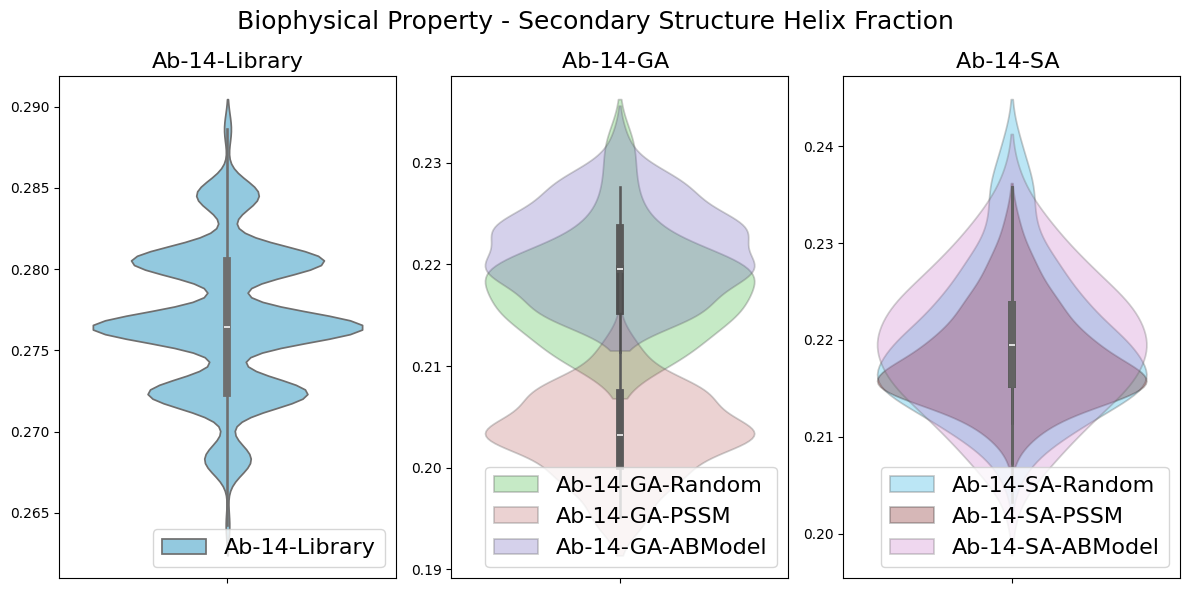

In [69]:
fig, axs = plt.subplots(1, 3, figsize=(12, 6)) 
sns.violinplot(y=df['secondary_structure_Helix_fracton'], color='skyblue', alpha=1, ax=axs[0], label='Ab-'+str(AB_ID)+'-Library')
#sns.violinplot(y=pssm_df['secondary_structure_helix_frac'], color='yellow', alpha=0.8, ax=axs[0], label='Ab-'+str(AB_ID)+'-PSSM')
sns.violinplot(y=ga_random['secondary_structure_helix_frac'], color='limegreen',  alpha=0.3, ax=axs[1], label='Ab-'+str(AB_ID)+'-GA-Random')
sns.violinplot(y=ga_pssm['secondary_structure_helix_frac'],  color='indianred', alpha=0.3, ax=axs[1], label='Ab-'+str(AB_ID)+'-GA-PSSM')
sns.violinplot(y=ga_abmodel['secondary_structure_helix_frac'], color='slateblue', alpha=0.3, ax=axs[1], label='Ab-'+str(AB_ID)+'-GA-ABModel')
sns.violinplot(y=sa_random['secondary_structure_helix_frac'], color='deepskyblue',  alpha=0.3, ax=axs[2], label='Ab-'+str(AB_ID)+'-SA-Random')
sns.violinplot(y=sa_pssm['secondary_structure_helix_frac'],  color='darkred', alpha=0.3, ax=axs[2], label='Ab-'+str(AB_ID)+'-SA-PSSM')
sns.violinplot(y=sa_abmodel['secondary_structure_helix_frac'], color='orchid', alpha=0.3, ax=axs[2], label='Ab-'+str(AB_ID)+'-SA-ABModel')


axs[0].set_title('Ab-'+str(AB_ID)+'-Library', fontsize=16)
axs[1].set_title('Ab-'+str(AB_ID)+'-GA ', fontsize=16)
axs[2].set_title('Ab-'+str(AB_ID)+'-SA ', fontsize=16)
axs[0].set_ylabel('')
axs[1].set_ylabel('')
axs[2].set_ylabel('')
axs[0].legend(fontsize=16, loc='lower right')
axs[1].legend(fontsize=16, loc='lower right')
axs[2].legend(fontsize=16, loc='lower right')

plt.suptitle('Biophysical Property - Secondary Structure Helix Fraction', fontsize=18)
plt.tight_layout() 
plt.savefig('plots/Ab-'+str(AB_ID)+'/Ab-'+str(AB_ID)+'-Helix')
plt.show()

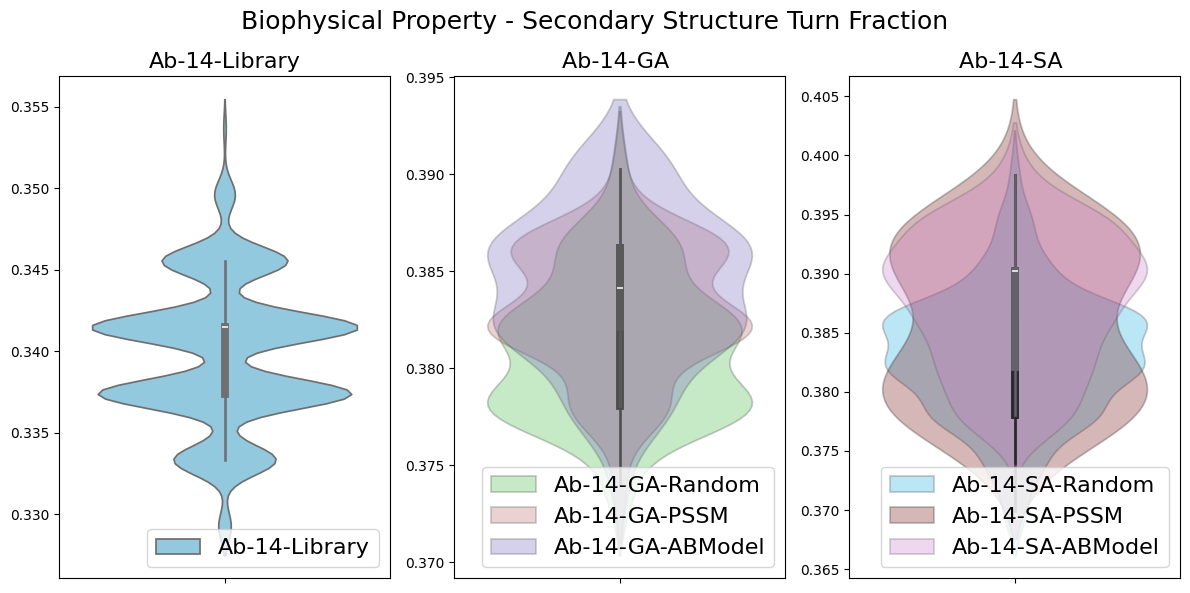

In [74]:
fig, axs = plt.subplots(1, 3, figsize=(12, 6)) 
sns.violinplot(y=df['secondary_structure_Turn_fracton'], color='skyblue', alpha=1, ax=axs[0], label='Ab-'+str(AB_ID)+'-Library')
#sns.violinplot(y=pssm_df['secondary_structure_turn_frac'], color='yellow', alpha=0.8, ax=axs[0], label='Ab-'+str(AB_ID)+'-PSSM')
sns.violinplot(y=ga_random['secondary_structure_turn_frac'], color='limegreen',  alpha=0.3, ax=axs[1], label='Ab-'+str(AB_ID)+'-GA-Random')
sns.violinplot(y=ga_pssm['secondary_structure_turn_frac'],  color='indianred', alpha=0.3, ax=axs[1], label='Ab-'+str(AB_ID)+'-GA-PSSM')
sns.violinplot(y=ga_abmodel['secondary_structure_turn_frac'], color='slateblue', alpha=0.3, ax=axs[1], label='Ab-'+str(AB_ID)+'-GA-ABModel')
sns.violinplot(y=sa_random['secondary_structure_turn_frac'], color='deepskyblue',  alpha=0.3, ax=axs[2], label='Ab-'+str(AB_ID)+'-SA-Random')
sns.violinplot(y=sa_pssm['secondary_structure_turn_frac'],  color='darkred', alpha=0.3, ax=axs[2], label='Ab-'+str(AB_ID)+'-SA-PSSM')
sns.violinplot(y=sa_abmodel['secondary_structure_turn_frac'], color='orchid', alpha=0.3, ax=axs[2], label='Ab-'+str(AB_ID)+'-SA-ABModel')


axs[0].set_title('Ab-'+str(AB_ID)+'-Library', fontsize=16)
axs[1].set_title('Ab-'+str(AB_ID)+'-GA ', fontsize=16)
axs[2].set_title('Ab-'+str(AB_ID)+'-SA ', fontsize=16)
axs[0].set_ylabel('')
axs[1].set_ylabel('')
axs[2].set_ylabel('')
axs[0].legend(fontsize=16, loc='lower right')
axs[1].legend(fontsize=16, loc='lower right')
axs[2].legend(fontsize=16, loc='lower right')

plt.suptitle('Biophysical Property - Secondary Structure Turn Fraction', fontsize=18)
plt.tight_layout() 
plt.savefig('plots/Ab-'+str(AB_ID)+'/Ab-'+str(AB_ID)+'-Turn')
plt.show()

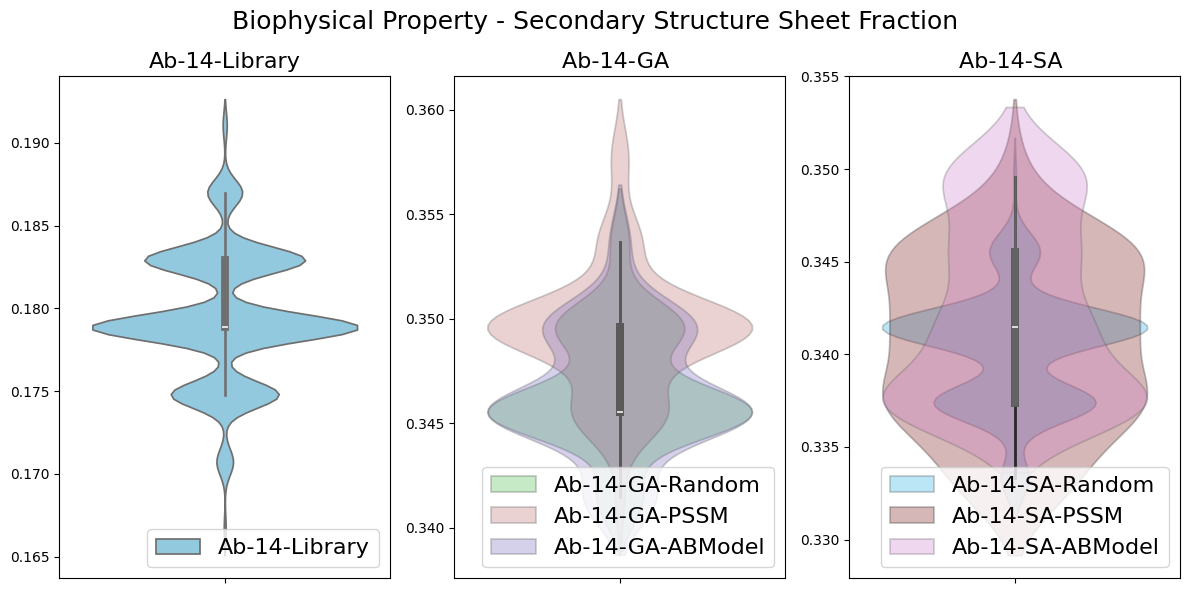

In [75]:
fig, axs = plt.subplots(1, 3, figsize=(12, 6)) 
sns.violinplot(y=df['secondary_structure_Sheet_fracton'], color='skyblue', alpha=1, ax=axs[0], label='Ab-'+str(AB_ID)+'-Library')
#sns.violinplot(y=pssm_df['secondary_structure_sheet_frac'], color='yellow', alpha=0.8, ax=axs[0], label='Ab-'+str(AB_ID)+'-PSSM')
sns.violinplot(y=ga_random['secondary_structure_sheet_frac'], color='limegreen',  alpha=0.3, ax=axs[1], label='Ab-'+str(AB_ID)+'-GA-Random')
sns.violinplot(y=ga_pssm['secondary_structure_sheet_frac'],  color='indianred', alpha=0.3, ax=axs[1], label='Ab-'+str(AB_ID)+'-GA-PSSM')
sns.violinplot(y=ga_abmodel['secondary_structure_sheet_frac'], color='slateblue', alpha=0.3, ax=axs[1], label='Ab-'+str(AB_ID)+'-GA-ABModel')
sns.violinplot(y=sa_random['secondary_structure_sheet_frac'], color='deepskyblue',  alpha=0.3, ax=axs[2], label='Ab-'+str(AB_ID)+'-SA-Random')
sns.violinplot(y=sa_pssm['secondary_structure_sheet_frac'],  color='darkred', alpha=0.3, ax=axs[2], label='Ab-'+str(AB_ID)+'-SA-PSSM')
sns.violinplot(y=sa_abmodel['secondary_structure_sheet_frac'], color='orchid', alpha=0.3, ax=axs[2], label='Ab-'+str(AB_ID)+'-SA-ABModel')

axs[0].set_title('Ab-'+str(AB_ID)+'-Library', fontsize=16)
axs[1].set_title('Ab-'+str(AB_ID)+'-GA ', fontsize=16)
axs[2].set_title('Ab-'+str(AB_ID)+'-SA ', fontsize=16)
axs[0].set_ylabel('')
axs[1].set_ylabel('')
axs[2].set_ylabel('')
axs[0].legend(fontsize=16, loc='lower right')
axs[1].legend(fontsize=16, loc='lower right')
axs[2].legend(fontsize=16, loc='lower right')

plt.suptitle('Biophysical Property - Secondary Structure Sheet Fraction', fontsize=18)
plt.tight_layout() 
plt.savefig('plots/Ab-'+str(AB_ID)+'/Ab-'+str(AB_ID)+'-Sheet')
plt.show()

## Embeddings 

In [18]:
from model.create_dataset import esm_alphabet, convert  
from model.affinity_pred_model import AffinityPredictor
from model.utilities import get_model 
import random 
import torch 

In [19]:
model = get_model() 

In [20]:
##### => Get embeddings for Library antibodies 
inputs = df['Sequence'].tolist()  
outputs_list = []
with torch.no_grad():
    for i in range(0, len(inputs)):
        seq = torch.unsqueeze(torch.tensor(convert(inputs[i])),0).to(device) 
        outputs_batch =  model.encoder(seq, repr_layers=[33], return_contacts=True) 
        outputs_list.append(torch.mean(outputs_batch['representations'][33], dim=1).to('cpu')) 
        print(i+1, end = ", ", flush=True) 
        del seq, outputs_batch  
        torch.cuda.empty_cache() 
library_embs = torch.cat(outputs_list).numpy() 
library_embs.shape


1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222

(2500, 1280)

In [21]:
##### => Get embeddings for PSSM 
inputs = pssm_df['Sequence'].tolist()  
outputs_list = []
with torch.no_grad():
    for i in range(0, len(inputs)):
        seq = torch.unsqueeze(torch.tensor(convert(inputs[i])),0).to(device) 
        outputs_batch =  model.encoder(seq, repr_layers=[33], return_contacts=True) 
        outputs_list.append(torch.mean(outputs_batch['representations'][33], dim=1).to('cpu')) 
        print(i+1, end = ", ", flush=True) 
        del seq, outputs_batch  
        torch.cuda.empty_cache() 
pssm_embs = torch.cat(outputs_list).numpy() 
pssm_embs.shape

1, 

2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 2

(1000, 1280)

In [22]:
##### => Get embeddings for GA-Random 
inputs = ga_random['Sequence'].tolist()  
outputs_list = []
with torch.no_grad():
    for i in range(0, len(inputs)):
        seq = torch.unsqueeze(torch.tensor(convert(inputs[i])),0).to(device) 
        outputs_batch =  model.encoder(seq, repr_layers=[33], return_contacts=True) 
        outputs_list.append(torch.mean(outputs_batch['representations'][33], dim=1).to('cpu')) 
        print(i+1, end = ", ", flush=True) 
        del seq, outputs_batch  
        torch.cuda.empty_cache() 
ga_random_embs = torch.cat(outputs_list).numpy() 
ga_random_embs.shape

1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 

(50, 1280)

In [23]:
##### => Get embeddings for GA-PSSM
inputs = ga_pssm['Sequence'].tolist()  
outputs_list = []
with torch.no_grad():
    for i in range(0, len(inputs)):
        seq = torch.unsqueeze(torch.tensor(convert(inputs[i])),0).to(device) 
        outputs_batch =  model.encoder(seq, repr_layers=[33], return_contacts=True) 
        outputs_list.append(torch.mean(outputs_batch['representations'][33], dim=1).to('cpu')) 
        print(i+1, end = ", ", flush=True) 
        del seq, outputs_batch  
        torch.cuda.empty_cache() 
ga_pssm_embs = torch.cat(outputs_list).numpy() 
ga_pssm_embs.shape

1, 

2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 

(50, 1280)

In [24]:
##### => Get embeddings for GA-ABModel
inputs = ga_abmodel['Sequence'].tolist()  
outputs_list = []
with torch.no_grad():
    for i in range(0, len(inputs)):
        seq = torch.unsqueeze(torch.tensor(convert(inputs[i])),0).to(device) 
        outputs_batch =  model.encoder(seq, repr_layers=[33], return_contacts=True) 
        outputs_list.append(torch.mean(outputs_batch['representations'][33], dim=1).to('cpu')) 
        print(i+1, end = ", ", flush=True) 
        del seq, outputs_batch  
        torch.cuda.empty_cache() 
ga_abmodel_embs = torch.cat(outputs_list).numpy() 
ga_abmodel_embs.shape

1, 

2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 

(50, 1280)

In [25]:
##### => Get embeddings for SA-Random 
inputs = sa_random['Sequence'].tolist()  
outputs_list = []
with torch.no_grad():
    for i in range(0, len(inputs)):
        seq = torch.unsqueeze(torch.tensor(convert(inputs[i])),0).to(device) 
        outputs_batch =  model.encoder(seq, repr_layers=[33], return_contacts=True) 
        outputs_list.append(torch.mean(outputs_batch['representations'][33], dim=1).to('cpu')) 
        print(i+1, end = ", ", flush=True) 
        del seq, outputs_batch  
        torch.cuda.empty_cache() 
sa_random_embs = torch.cat(outputs_list).numpy() 
sa_random_embs.shape

1, 

2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 

(201, 1280)

In [26]:
##### => Get embeddings for SA-PSSM
inputs = sa_pssm['Sequence'].tolist()  
outputs_list = []
with torch.no_grad():
    for i in range(0, len(inputs)):
        seq = torch.unsqueeze(torch.tensor(convert(inputs[i])),0).to(device) 
        outputs_batch =  model.encoder(seq, repr_layers=[33], return_contacts=True) 
        outputs_list.append(torch.mean(outputs_batch['representations'][33], dim=1).to('cpu')) 
        print(i+1, end = ", ", flush=True) 
        del seq, outputs_batch  
        torch.cuda.empty_cache() 
sa_pssm_embs = torch.cat(outputs_list).numpy() 
sa_pssm_embs.shape

1, 

2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 

(44, 1280)

In [27]:
##### => Get embeddings for SA-ABModel
inputs = sa_abmodel['Sequence'].tolist()  
outputs_list = []
with torch.no_grad():
    for i in range(0, len(inputs)):
        seq = torch.unsqueeze(torch.tensor(convert(inputs[i])),0).to(device) 
        outputs_batch =  model.encoder(seq, repr_layers=[33], return_contacts=True) 
        outputs_list.append(torch.mean(outputs_batch['representations'][33], dim=1).to('cpu')) 
        print(i+1, end = ", ", flush=True) 
        del seq, outputs_batch  
        torch.cuda.empty_cache() 
sa_abmodel_embs = torch.cat(outputs_list).numpy() 
sa_abmodel_embs.shape

1, 

2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 

(109, 1280)

In [28]:
embeddings = np.concatenate((library_embs, pssm_embs, ga_random_embs, ga_pssm_embs, ga_abmodel_embs, sa_random_embs, sa_pssm_embs, sa_abmodel_embs ), axis=0) 
embeddings.shape 

(4004, 1280)

In [29]:
tsne_model = TSNE(n_components=2, perplexity=50., random_state=123) 
tsne_result = tsne_model.fit_transform(embeddings) 


In [30]:
tsne_result.shape 

(4004, 2)

In [31]:
a = library_embs.shape[0]
b = pssm_embs.shape[0] 
c = ga_random_embs.shape[0] 
d = ga_pssm_embs.shape[0] 
e = ga_abmodel_embs.shape[0]
f = sa_random_embs.shape[0] 
g = sa_pssm_embs.shape[0] 
h = sa_abmodel_embs.shape[0] 


print(a,b,c,d, e, f, g, h)

2500 1000 50 50 50 201 44 109


In [32]:
labels = df['Pred_affinity'].tolist()+pssm_df['Pred_affinity'].tolist()+ ga_random['Pred_affinity'].tolist()+ga_pssm['Pred_affinity'].tolist()+ ga_abmodel['Pred_affinity'].tolist() + sa_random['Pred_affinity'].tolist()+ sa_pssm['Pred_affinity'].tolist()+ sa_abmodel['Pred_affinity'].tolist() 
print(len(labels)) 
labels_mut = df['num_mutation'].tolist()+pssm_df['num_mut'].tolist()+ga_random['num_mutation'].tolist() + ga_pssm['num_mutation'].tolist() + ga_abmodel['num_mutation'].tolist() + sa_random['num_mut'].tolist() + sa_pssm['num_mut'].tolist()  + sa_abmodel['num_mut'].tolist() 
print(len(labels_mut))
class_labels = ['Ab-14-Library']*a + ['Ab-14-PSSM']*b + ['Ab-14-GA-Random']*c + ['Ab-14-GA-PSSM']*d + ['Ab-14-GA-ABModel']*e + ['Ab-14-SA-Random']*f + ['Ab-14-SA-PSSM']*g + ['Ab-14-SA-ABModel']*h  
print(len(class_labels))


4004
4004
4004


## Plot 

In [76]:
data = pd.DataFrame(data=tsne_result, columns=['tsne_1', 'tsne_2'])
data['Generated By'] = class_labels    
data['pred_affinity'] = labels   
data['num_mut'] = labels_mut  


In [83]:
data = pd.read_csv('embeddings/ab-14.csv') 

In [74]:
fig = px.scatter(
    data,
    x='tsne_1',
    y='tsne_2',
    color='Generated By',
    title='Ab-14',
    labels={'tsne_1': 'TSNE Component 1', 'tsne_2': 'TSNE Component 2', 'Generated By': 'Generated By'},
    template='plotly_white'  # Change template here, e.g., 'plotly', 'ggplot2', 'seaborn', etc.
)

# Adjust the figure size and font sizes
fig.update_layout(
    width=800,  # Set the width of the plot
    height=700,  # Set the height of the plot
    title=dict(font=dict(size=20)),  # Title font size
    xaxis_title=dict(font=dict(size=16)),  # X-axis title font size
    yaxis_title=dict(font=dict(size=16)),  # Y-axis title font size
    legend=dict( itemsizing='constant', traceorder='normal', font=dict(size=16)),  # Legend font size
    xaxis=dict(showline=False, showgrid=False),  # Remove x-axis line and grid
    yaxis=dict(showline=False, showgrid=False),  # Remove y-axis line and grid
    
)

# Update marker properties for better visibility
fig.update_traces(marker=dict(size=4, opacity=0.9))

fig.show()

pio.write_html(fig, 'plots/Ab-14/Ab_14_Gen_Class.html')



In [80]:
fig = px.scatter(
    data,
    x='tsne_1',
    y='tsne_2',
    color='pred_affinity',
    title='Ab-14',
    labels={'tsne_1': 'TSNE Component 1', 'tsne_2': 'TSNE Component 2', 'pred_affinity': ' '},
    template='plotly_white'  # Change template here, e.g., 'plotly', 'ggplot2', 'seaborn', etc.
)

# Adjust the figure size and font sizes
fig.update_layout(
    width=700,  # Set the width of the plot
    height=700,  # Set the height of the plot
    title=dict(font=dict(size=20)),  # Title font size
    xaxis_title=dict(font=dict(size=16)),  # X-axis title font size
    yaxis_title=dict(font=dict(size=16)),  # Y-axis title font size
    legend=dict( itemsizing='constant', traceorder='normal', font=dict(size=16)),  # Legend font size
    xaxis=dict(showline=False, showgrid=False),  # Remove x-axis line and grid
    yaxis=dict(showline=False, showgrid=False),  # Remove y-axis line and grid
    
)

# Update marker properties for better visibility
fig.update_traces(marker=dict(size=4, opacity=0.9))

fig.show()

pio.write_html(fig, 'plots/Ab-14/Ab_14_logKd.html')

In [81]:
fig = px.scatter(
    data,
    x='tsne_1',
    y='tsne_2',
    color='num_mut',
    title='Ab-14',
    labels={'tsne_1': 'TSNE Component 1', 'tsne_2': 'TSNE Component 2', 'num_mut': ' '},
    template='plotly_white'  # Change template here, e.g., 'plotly', 'ggplot2', 'seaborn', etc.
)

# Adjust the figure size and font sizes
fig.update_layout(
    width=700,  # Set the width of the plot
    height=700,  # Set the height of the plot
    title=dict(font=dict(size=20)),  # Title font size
    xaxis_title=dict(font=dict(size=16)),  # X-axis title font size
    yaxis_title=dict(font=dict(size=16)),  # Y-axis title font size
    legend=dict( itemsizing='constant', traceorder='normal', font=dict(size=16)),  # Legend font size
    xaxis=dict(showline=False, showgrid=False),  # Remove x-axis line and grid
    yaxis=dict(showline=False, showgrid=False),  # Remove y-axis line and grid
    
)

# Update marker properties for better visibility
fig.update_traces(marker=dict(size=4, opacity=0.9))

fig.show()

pio.write_html(fig, 'plots/Ab-14/Ab_14_num_mut.html')
plt.show() 
